## Good Graphs?

<p><a href="https://commons.wikimedia.org/wiki/File:Minard.png#/media/File:Minard.png"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/29/Minard.png/1200px-Minard.png" alt="Minard.png"></a><br>By <a href="https://en.wikipedia.org/wiki/Charles_Minard" class="extiw" title="w:Charles Minard">Charles Minard</a> (1781-1870), Public Domain, <a href="https://commons.wikimedia.org/w/index.php?curid=297925">Link</a></p>




The above is a classic example of great data visualisation - originally from 1869, showing the devastation over the march of Napoleon towards defeat in Moscow and their return home.  This chart uses graphical design to tell a story, it combines the display of multi-dimensional data with a striking graphical layout.  

We can perhaps aspire to creating visualisations as good as this but doing so would require a combination of great data handling skills and an eye for good visual design.  I expect you all to master the first of these but it might be too much to expect the latter from everyone.  Even so, we can all learn to appreciate what makes a good visualisation work and what we should avoid in presenting data. 

The [chapter I've recommended for reading](https://link.springer.com/content/pdf/10.1007%2F978-3-540-33037-0_3.pdf) on this gives a bit of an overview of what makes for good data visualisation. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="white")


## Choice of Graphical Form

### Scales
- numerical scales, common to include zero, range of values can influence interpretation
- in a histogram, the size of bins (granularity of the scale) can obscure or reveal insights
- scales in related graphs should be comparable
- for categorical variables (eg. names of cities) the ordering can be influential


<AxesSubplot:>

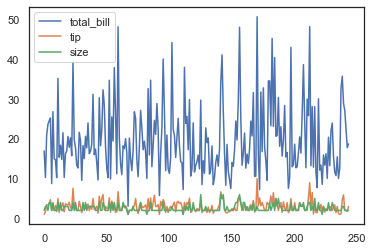

In [2]:
# load dataset "tips" from https://github.com/mwaskom/seaborn-data
tips = sns.load_dataset("tips")
tips.plot()

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


(0.0, 30.0)

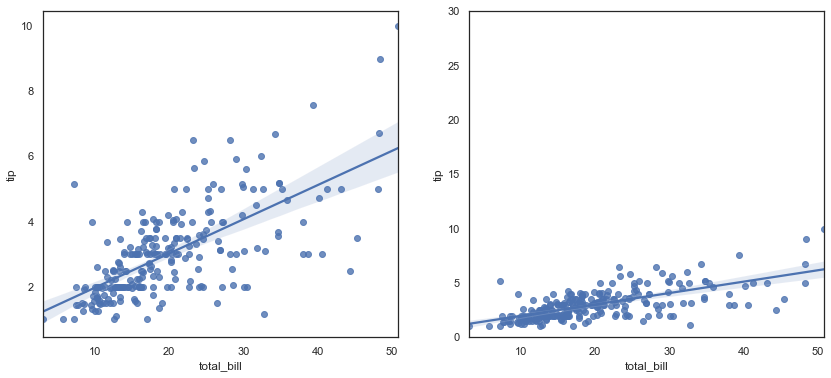

In [47]:
# Choice of axis limits
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(14,6))
p1 = sns.regplot(x="total_bill", y="tip", data=tips, ax=ax1);
p2 = sns.regplot(x="total_bill", y="tip", data=tips, ax=ax2);
ax2.set_ylim(0,30)

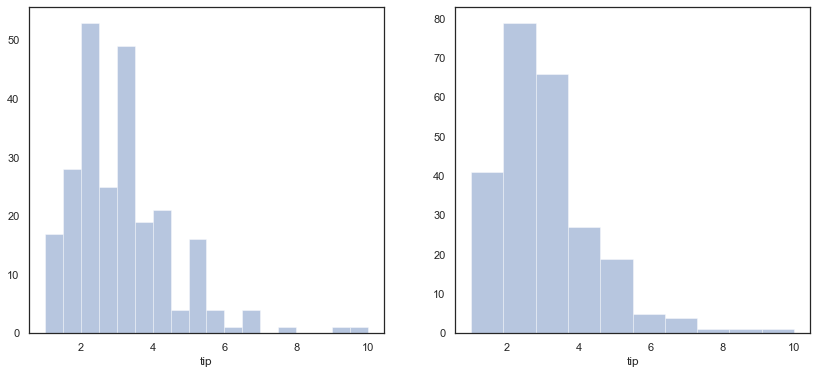

In [61]:
# Histogram - number of bins 
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(14,6))
sns.distplot(tips.tip, kde=False, ax=ax1)
sns.distplot(tips.tip, kde=False, bins=10, ax=ax2)

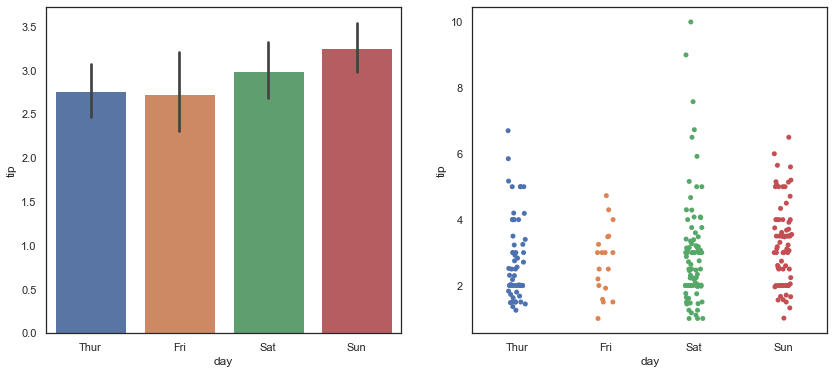

In [71]:
# Different ways to show categorical data
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(14,6))
sns.barplot(data=tips, x="day", y="tip", ax=ax1)
sns.stripplot(data=tips, x="day", y="tip", ax=ax2)


## Overlaying Information
- eg. overlay of smoothed mean, indications of error bars
- overlay should aid the interpretation of the data
- take care not to obscure data with too many additions

## Captions, Legends and Annotations
- graphs should always have labelled axes, including units where appropriate
- legends attach labels to different parts of the graph (colours, line styles), should be on the plot (Tufte)
- annotations should be used sparingly (see overlays) eg. Figure 2.8


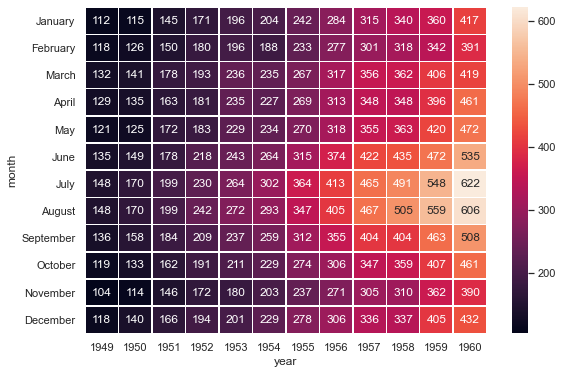

In [73]:
# An example of the use of colour and annotations
# https://seaborn.pydata.org/archive/0.10/examples/heatmap_annotation.html

flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)


## Apect Ratio
- squashing a graph one way or the other can hugely distort the presentation (Figure 2.9)

## Colour
- use of colour should take account of colour blindness [palletes for colour blindness](http://mkweb.bcgsc.ca/colorblind/) [some examples and advice](http://www.dundas.com/support/blog/visualizing-for-the-color-blind)
- certain colours have a cultural meaning that might effect how your graphics are interpreted


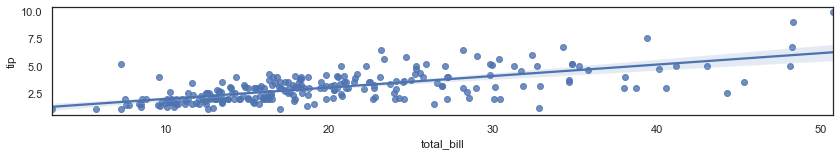

In [88]:
# Choice of axis limits
fig, ax = plt.subplots(ncols=1, figsize=(14,2))
p1 = sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

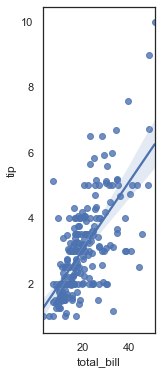

In [89]:
fig, ax = plt.subplots(ncols=1, figsize=(2,6))
p1 = sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);


## Multidimensional Visualisation
- techniques for displaying more than a simple binary relationship
- many variables influencing different aspects of the graphic
- is a 3D plot ever a good idea?
- scatterplot matrix shows how pairs of variables change together (Figure 2.10)
- trellis display arranges related graphs in a grid (Figure 2.14)


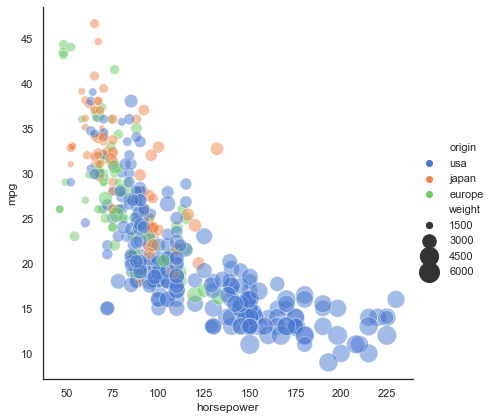

In [7]:
# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

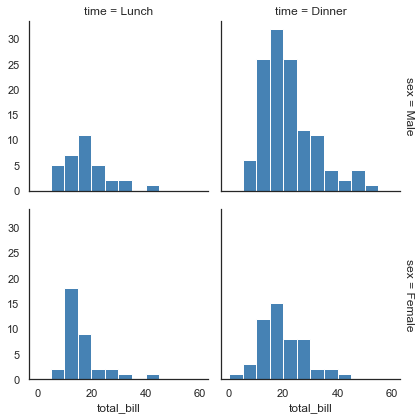

In [5]:
# plot multiple facets from data in a grid
g = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "total_bill", color="steelblue", bins=bins)

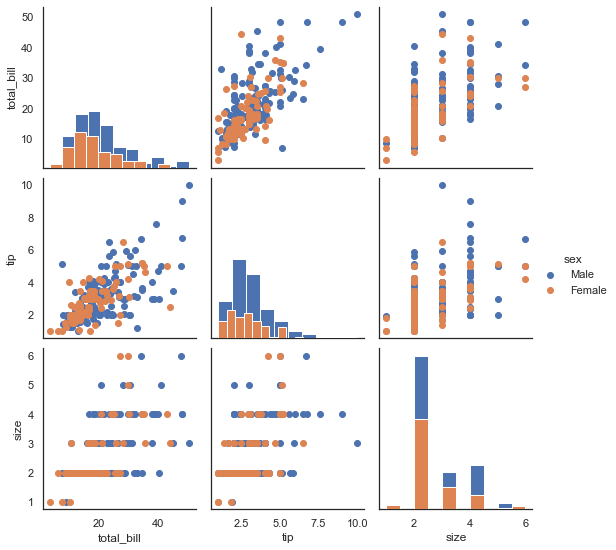

In [102]:
# Scatter plot matrix with histograms on the diagonal
g = sns.PairGrid(tips, hue="sex")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

## Maps
- overlaying data on maps allows you to associated data points with geographical areas
- can be misleading since size of geographic region does not relate to population
    - see [these cartograms](https://www.core77.com/posts/90771/A-Great-Example-of-Better-Data-Visualization-This-Voting-Map-GIF) showing a method for scaling geographical areas based on population.


[Data Vizualisation Chart Types](https://eazybi.com/blog/data_visualization_and_chart_types/) has a list of chart types with some ideas of when to use them. It includes a reference to [choosing a good chart](http://extremepresentation.typepad.com/files/choosing-a-good-chart-09.pdf) by Dr. Andrew Abela, a useful cheat sheet.
